<center><p float="center">
  <img src="https://images.pexels.com/photos/262918/pexels-photo-262918.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" width=720/>
</p></center>

<center><font size=6>Restaurant Review Analysis</center></font>

## Problem Statement

### Business Context

In the food industry, customer satisfaction plays a pivotal role in shaping the success of individual outlets and the overall brand. A leading global food aggregator is keen on understanding and improving customer experiences across the diverse range of restaurants it lists on its platform. The company recognizes the significance of customer reviews in gaining insights into service quality, food offerings, and overall satisfaction.

### Problem Definition

Despite the abundance of customer reviews available, the company faces significant challenges in deriving actionable insights from these valuable data sources. The manual analysis of extensive amounts of unstructured text data tends to be time-consuming and non-scalable. The key problems to address include:

- **Unstructured Data Challenge**: Customer reviews are expressed in natural language and an unstructured format, creating difficulties in efficiently extracting meaningful information.

- **Scale of Data**: With numerous restaurants, the company accumulates a substantial volume of reviews. Manually processing this vast amount of data is not scalable and necessitates an automated approach.

- **Customer Sentiment Understanding**: Discerning customer sentiments from reviews, whether positive, negative, or neutral, poses a significant challenge. This understanding is crucial for the company to identify the preferences of different customers and devise strategies for targeted marketing.

### Objective

As a data scientist at the company, you have been provided a sample of the customer review data and asked to created a predictive model to analyze the reviews. The objective is to build a robust sentiment analyzer using a Large Language Model (LLM) that accurately predicts the sentiment of customers from the reviews, thereby enhancing the company's ability to understand customer sentiments at scale, enabling data-driven decision-making, and improving overall customer satisfaction.

## Installing and Importing Necessary Libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 199.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 147.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 234.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 227.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 2.1.1 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.1 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you ha

**Note**: pip's dependency error can be ignored as it does not affect further execution.

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.34.2 requires huggingface-hub>=0.21.0, but you have huggingface-hub 0.20.3 which is incompatible.
transformers 4.44.2 requires huggingface-hub<1.0,>=0.23.2, but you have huggingface-hub 0.20.3 which is incompatible.


In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

## Import the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/GL_Deeplearning_notebooks/NLP_w4")

In [ ]:
data = pd.read_csv("restaurant_reviews.csv")

## Data Overview

In [ ]:
# checking the first five rows of the data
data.head()

,restaurant_ID,rating_review,review_full
0,FLV202,5,"Totally in love with the Auro of the place, re..."
1,SAV303,5,Kailash colony is brimming with small cafes no...
2,YUM789,5,Excellent taste and awesome decorum. Must visi...
3,TST101,5,I have visited at jw lough/restourant. There w...
4,EAT456,5,Had a great experience in the restaurant food ...


In [ ]:
# checking the shape of the data
data.shape

(20, 3)

**Observations**

- Data has 20 rows and 3 columns

In [ ]:
# checking for missing values
data.isnull().sum()

restaurant_ID    0
rating_review    0
review_full      0
dtype: int64

**Observations**

- There are no missing values in the data

## Model Building

### Loading the model (Llama)

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(repo_id=model_name_or_path,filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    # n_gpu_layers=43,  # uncomment and change this value based on GPU VRAM pool.
    n_ctx=4096,  # Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Loading the model (Mistral)

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
llm = Llama(
    model_path=model_path,
    n_ctx=1024,
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

### Defining Model Response Parameters

In [ ]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

- **`max_tokens`**: This parameter **specifies the maximum number of tokens that the model should generate** in response to the prompt.

- **`temperature`**: This parameter **controls the randomness of the generated response**. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response.

- **`top_p`**: This parameter **controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection**. A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response.

- **`repeat_penalty`**: This parameter **controls the penalty for repeating tokens in the generated response**. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens.

- **`top_k`**: This parameter **controls the maximum number of most-likely next tokens to consider** when generating the response at each step.

- **`stop`**: This parameter is a **list of tokens that are used to dynamically stop response generation** whenever the tokens in the list are encountered.

- **`echo`**: This parameter **controls whether the input (prompt) to the model should be returned** in the model response.

- **`seed`**: This parameter **specifies a seed value that helps replicate results**.


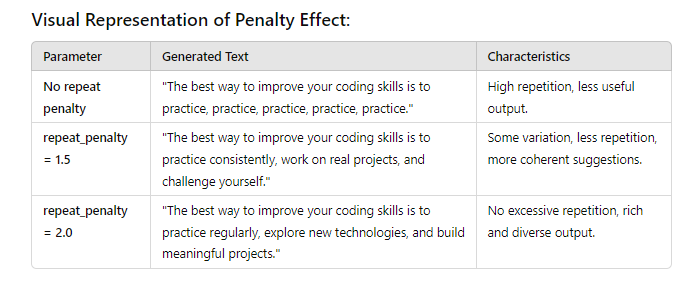

### Utility function

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## 1. Sentiment Analysis (Llama)

In [ ]:
# creating a copy of the data
data_1 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_1 = """
    You are an AI analyzing restaurant reviews. Classify the sentiment of the provided review into the following categories:
    - Positive
    - Negative
    - Neutral
"""

In [ ]:
data_1['model_response'] = data_1['review_full'].apply(lambda x: generate_llama_response(instruction_1, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_1['model_response'].head()

0     Sure, I can help you with that! Based on the ...
1     Sure, I can help you with that! Based on the ...
2     Sure, I can help you with that! Based on the ...
3     Sure, I can help you with that! Based on the ...
4     Sure, I can help you with that! Based on the ...
Name: model_response, dtype: object

In [ ]:
i = 2
print(data_1.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_1.loc[i, 'model_response'])

 Sure, I can help you with that! Based on the review you provided, here's my analysis:

The sentiment of the review is Positive. Here are some reasons why:

1. Excellent taste: The reviewer enjoyed the food and described it as "excellent." This indicates a positive experience.
2. Awesome decorum: The reviewer appreciated the restaurant's ambiance, which suggests that they had a pleasant dining experience.
3. Great service: Subham Barnwal provided good service, according to the reviewer. This is another indication of a positive experience.
4. One of the best experiences: The reviewer states that this was one of their best experiences, indicating a strong positive sentiment.

Overall, based on the language used in the review, it seems that the reviewer had a very enjoyable dining experience at the restaurant.


In [ ]:
def extract_sentiment(model_response):
    if 'positive' in model_response.lower():
        return 'Positive'
    elif 'negative' in model_response.lower():
        return 'Negative'
    elif 'neutral' in model_response.lower():
        return 'Neutral'

In [ ]:
# applying the function to the model response
data_1['sentiment'] = data_1['model_response'].apply(extract_sentiment)
data_1['sentiment'].head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: sentiment, dtype: object

In [ ]:
data_1['sentiment'].value_counts()

Positive    16
Negative     4
Name: sentiment, dtype: int64

In [ ]:
final_data_1 = data_1.drop(['model_response'], axis=1)
final_data_1.head()

,restaurant_ID,rating_review,review_full,sentiment
0,FLV202,5,"Totally in love with the Auro of the place, re...",Positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,Positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Positive
3,TST101,5,I have visited at jw lough/restourant. There w...,Positive
4,EAT456,5,Had a great experience in the restaurant food ...,Positive


## 1. Sentiment Analysis (Mistral)

In [ ]:
# creating a copy of the data
data_1 = data.copy()

**We are going to use an instruction-tuned Mistral model. Hence, the format of the input to the model varies from that of Llama.**

In [ ]:
#Defining the response funciton for Task 1.
def response_1(prompt,review):
    model_output = llm(
      f"""
      Q: {prompt}
      Review: {review}
      A:
      """,
      max_tokens=32,
      stop=["Q:", "\n"],
      temperature=0.01,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]

    return temp_output

In [ ]:
# defining the instructions for the model
instruction_1 = """
    You are an AI analyzing restaurant reviews. Classify the sentiment of the provided review into the following categories:
    - Positive
    - Negative
    - Neutral
"""

In [ ]:
data_1['model_response'] = data_1['review_full'].apply(lambda x: response_1(instruction_1, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =    2933.04 ms
llama_print_timings:      sample time =      16.89 ms /    32 runs   (    0.53 ms per token,  1894.39 tokens per second)
llama_print_timings: prompt eval time =    2376.97 ms /   191 tokens (   12.44 ms per token,    80.35 tokens per second)
llama_print_timings:        eval time =   25452.43 ms /    31 runs   (  821.05 ms per token,     1.22 tokens per second)
llama_print_timings:       total time =   27952.41 ms /   222 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    2933.04 ms
llama_print_timings:      sample time =      17.69 ms /    32 runs   (    0.55 ms per token,  1808.73 tokens per second)
llama_print_timings: prompt eval time =    2879.26 ms /   235 tokens (   12.25 ms per token,    81.62 tokens per second)
llama_print_timings:        eval time =   25617.62 ms /    31 runs   (  826.37 ms per token,     1.21 tokens per second)
llama_print_timings:       to

In [ ]:
data_1['model_response'].head()

0     This review expresses a very positive sentime...
1     Based on the given review, the sentiment can ...
2     Based on the given review, it can be classifi...
3     Based on the given review, it can be classifi...
4     Based on the provided review, the sentiment i...
Name: model_response, dtype: object

In [ ]:
i = 2
print(data_1.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_1.loc[i, 'model_response'])

 Based on the given review, it can be classified as a positive sentiment. The words "excellent taste," "awesome decorum," "must visit


In [ ]:
def extract_sentiment(model_response):
    if 'positive' in model_response.lower():
        return 'Positive'
    elif 'negative' in model_response.lower():
        return 'Negative'
    elif 'neutral' in model_response.lower():
        return 'Neutral'

In [ ]:
# applying the function to the model response
data_1['sentiment'] = data_1['model_response'].apply(extract_sentiment)
data_1['sentiment'].head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: sentiment, dtype: object

In [ ]:
data_1['sentiment'].value_counts()

sentiment
Positive    10
Negative     7
Neutral      3
Name: count, dtype: int64

In [ ]:
final_data_1 = data_1.drop(['model_response'], axis=1)
final_data_1.head()

,restaurant_ID,rating_review,review_full,sentiment
0,FLV202,5,"Totally in love with the Auro of the place, re...",Positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,Positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Positive
3,TST101,5,I have visited at jw lough/restourant. There w...,Positive
4,EAT456,5,Had a great experience in the restaurant food ...,Positive


## 2. Sentiment Analysis and Returning Structured Output (Llama)

In [ ]:
# creating a copy of the data
data_2 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_2 = """
    You are an AI analyzing restaurant reviews. Classify the sentiment of the provided review into the following categories:
    - Positive
    - Negative
    - Neutral

    Format the output as a JSON object with a single key-value pair as shown below:
    {"sentiment": "your_sentiment_prediction"}
"""

In [ ]:
data_2['model_response'] = data_2['review_full'].apply(lambda x: generate_llama_response(instruction_2, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_2['model_response'].head()

0     Sure, I can help you with that! Here's my ana...
1     Sure, I can help you classify the sentiment o...
2     Sure, I can help you with that! Based on the ...
3     Sure, I can help you classify the sentiment o...
4     Sure, I can help you classify the sentiment o...
Name: model_response, dtype: object

In [ ]:
i = 2
print(data_2.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_2.loc[i, 'model_response'])

 Sure, I can help you with that! Based on the review provided, here's my sentiment analysis:

{"sentiment": "Positive"}


In [ ]:
# applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)
data_2['model_response_parsed'].head()

0    {'sentiment': 'Positive'}
1    {'sentiment': 'Positive'}
2    {'sentiment': 'Positive'}
3    {'sentiment': 'Positive'}
4    {'sentiment': 'Positive'}
Name: model_response_parsed, dtype: object

In [ ]:
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

,sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


In [ ]:
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,restaurant_ID,rating_review,review_full,model_response,model_response_parsed,sentiment
0,FLV202,5,"Totally in love with the Auro of the place, re...","Sure, I can help you with that! Here's my ana...",{'sentiment': 'Positive'},Positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,"Sure, I can help you classify the sentiment o...",{'sentiment': 'Positive'},Positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,"Sure, I can help you with that! Based on the ...",{'sentiment': 'Positive'},Positive
3,TST101,5,I have visited at jw lough/restourant. There w...,"Sure, I can help you classify the sentiment o...",{'sentiment': 'Positive'},Positive
4,EAT456,5,Had a great experience in the restaurant food ...,"Sure, I can help you classify the sentiment o...",{'sentiment': 'Positive'},Positive


In [ ]:
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

,restaurant_ID,rating_review,review_full,sentiment
0,FLV202,5,"Totally in love with the Auro of the place, re...",Positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,Positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Positive
3,TST101,5,I have visited at jw lough/restourant. There w...,Positive
4,EAT456,5,Had a great experience in the restaurant food ...,Positive


In [ ]:
final_data_2['sentiment'].value_counts()

Neutral     7
Negative    7
Positive    6
Name: sentiment, dtype: int64

## 3. Identifying Overall Sentiment and Sentiment of Aspects of the Experience (Llama)

In [ ]:
# creating a copy of the data
data_3 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_3 = """
    You are an AI analyzing restaurant reviews. Classify the overall sentiment of the provided review into the following categories:
    - "Positive"
    - "Negative"
    - "Neutral"

    Once that is done, check for a mention of the following aspects in the review and classify the sentiment of each aspect as "Positive", "Negative", or "Neutral":
    1. "Food Quality"
    2. "Service"
    3. "Ambience"

    Output the overall sentiment and sentiment for each category in a JSON format with the following keys:
    {
        "Overall": "your_sentiment_prediction",
        "Food Quality": "your_sentiment_prediction",
        "Service": "your_sentiment_prediction",
        "Ambience": "your_sentiment_prediction"
    }

    In case one of the three aspects is not mentioned in the review, set "Not Applicable" (including quotes) for the corresponding JSON key value.
    Only return the JSON, do not return any other information.
"""

In [ ]:
data_3['model_response'] = data_3['review_full'].apply(lambda x: generate_llama_response(instruction_3, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_3['model_response'].head()

0     {\n        "Overall": "Positive",\n        "F...
1     {\n            "Overall": "Positive",\n      ...
2     {\n       "Overall": "Positive",\n       "Foo...
3     {\n        "Overall": "Positive",\n        "F...
4     {\n       "Overall": "Positive",\n       "Foo...
Name: model_response, dtype: object

In [ ]:
i = 2
print(data_3.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_3.loc[i, 'model_response'])

 {
       "Overall": "Positive",
       "Food Quality": "Positive",
       "Service": "Positive",
       "Ambience": "Neutral"
    }


In [ ]:
# applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

0    {'Overall': 'Positive', 'Food Quality': 'Posit...
1    {'Overall': 'Positive', 'Food Quality': 'Posit...
2    {'Overall': 'Positive', 'Food Quality': 'Posit...
3    {'Overall': 'Positive', 'Food Quality': 'Posit...
4    {'Overall': 'Positive', 'Food Quality': 'Posit...
Name: model_response_parsed, dtype: object

In [ ]:
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head()

,Overall,Food Quality,Service,Ambience
0,Positive,Positive,Positive,Positive
1,Positive,Positive,Neutral,Positive
2,Positive,Positive,Positive,Neutral
3,Positive,Positive,Positive,Neutral
4,Positive,Positive,Positive,Neutral


In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,restaurant_ID,rating_review,review_full,model_response,model_response_parsed,Overall,Food Quality,Service,Ambience
0,FLV202,5,"Totally in love with the Auro of the place, re...","{\n ""Overall"": ""Positive"",\n ""F...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,"{\n ""Overall"": ""Positive"",\n ...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Neutral,Positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,"{\n ""Overall"": ""Positive"",\n ""Foo...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral
3,TST101,5,I have visited at jw lough/restourant. There w...,"{\n ""Overall"": ""Positive"",\n ""F...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral
4,EAT456,5,Had a great experience in the restaurant food ...,"{\n ""Overall"": ""Positive"",\n ""Foo...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral


In [ ]:
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,restaurant_ID,rating_review,review_full,Overall,Food Quality,Service,Ambience
0,FLV202,5,"Totally in love with the Auro of the place, re...",Positive,Positive,Positive,Positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,Positive,Positive,Neutral,Positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Positive,Positive,Positive,Neutral
3,TST101,5,I have visited at jw lough/restourant. There w...,Positive,Positive,Positive,Neutral
4,EAT456,5,Had a great experience in the restaurant food ...,Positive,Positive,Positive,Neutral


In [ ]:
final_data_3['Food Quality'].value_counts()

Positive          7
Neutral           6
Negative          3
Mixed             3
Not Applicable    1
Name: Food Quality, dtype: int64

In [ ]:
final_data_3['Service'].value_counts()

Positive        9
Negative        8
Neutral         1
Slow            1
Inconsistent    1
Name: Service, dtype: int64

In [ ]:
final_data_3['Ambience'].value_counts()

Not Applicable    8
Neutral           6
Positive          5
Neutrial          1
Name: Ambience, dtype: int64

## 3. Identifying Overall Sentiment and Sentiment of Aspects of the Experience (Mistral)

In [ ]:
# creating a copy of the data
data_3 = data.copy()

In [ ]:
def response_2(prompt,review,sentiment):
    model_output = llm(
      f"""
      Q: {prompt}
      review: {review}
      sentiment: {sentiment}
      A:
      """,
      max_tokens=64,
      stop=["Q:", "\n"],
      temperature=0.01,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

**Note:** We have already predicted the sentiment of the review. We can use this information while designing the prompt for this task. This way, it will reduce the computational complexity.

The sentiment is stored in the 'final_data_1' dataframe which is from the TASK 1.

In [ ]:
# defining the instructions for the model
instruction_3 = """
    You are provided a review and it's sentiment.

    Instructions:
    Classify the sentiment of each aspect as either of "Positive", "Negative", or "Neutral" only and not any other for the given review:
    1. "Food Quality"
    2. "Service"
    3. "Ambience"
    In case one of the three aspects is not mentioned in the review, return "Not Applicable" (including quotes) for the corresponding JSON key value.
    Return the output in the format {"Overall": given sentiment input,"Food Quality": "your_sentiment_prediction","Service": "your_sentiment_prediction","Ambience": "your_sentiment_prediction"}

"""

In [ ]:
data_3['model_response'] = final_data_1[['review_full','sentiment']].apply(lambda x: response_2(instruction_3, x[0],x[1]),axis=1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =    2933.04 ms
llama_print_timings:      sample time =      17.65 ms /    31 runs   (    0.57 ms per token,  1756.17 tokens per second)
llama_print_timings: prompt eval time =    3303.27 ms /   249 tokens (   13.27 ms per token,    75.38 tokens per second)
llama_print_timings:        eval time =   25245.10 ms /    30 runs   (  841.50 ms per token,     1.19 tokens per second)
llama_print_timings:       total time =   28684.42 ms /   279 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    2933.04 ms
llama_print_timings:      sample time =      18.34 ms /    33 runs   (    0.56 ms per token,  1798.95 tokens per second)
llama_print_timings: prompt eval time =    2871.49 ms /   241 tokens (   11.91 ms per token,    83.93 tokens per second)
llama_print_timings:        eval time =   26837.59 ms /    32 runs   (  838.67 ms per token,     1.19 tokens per second)
llama_print_timings:       to

In [ ]:
data_3['model_response'].values

array(['{"Overall": "Positive","Food Quality": "Positive","Service": "Positive","Ambience": "Positive"}',
       '{"Overall": "Positive","Food Quality": "Positive","Service": "Not Applicable","Ambience": "Positive"}',
       '{"Overall": "Positive","Food Quality": "Positive","Service": "Positive","Ambience": "Positive"}',
       '{"Overall": "Positive","Food Quality": "Not Applicable","Service": "Positive","Ambience": "Not Applicable"}',
       '{"Overall": "Positive","Food Quality": "Positive","Service": "Positive","Ambience": "Not Applicable"}',
       '{"Overall": "Positive","Food Quality": "Positive","Service": "Positive","Ambience": "Positive"}',
       '{"Overall": "Positive","Food Quality": "Neutral","Service": "Positive","Ambience": "Positive"}',
       '{"Overall": "Positive","Food Quality": "Neutral","Service": "Negative","Ambience": "Not Applicable"}',
       '{"Overall": "Positive","Food Quality": "Neutral","Service": "Negative","Ambience": "Positive"}',
       '{"Overall":

In [ ]:
i = 2
print(data_3.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_3.loc[i, 'model_response'])

{"Overall": "Positive","Food Quality": "Positive","Service": "Positive","Ambience": "Positive"}


In [ ]:
# applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed']

0     {'Overall': 'Positive', 'Food Quality': 'Posit...
1     {'Overall': 'Positive', 'Food Quality': 'Posit...
2     {'Overall': 'Positive', 'Food Quality': 'Posit...
3     {'Overall': 'Positive', 'Food Quality': 'Not A...
4     {'Overall': 'Positive', 'Food Quality': 'Posit...
5     {'Overall': 'Positive', 'Food Quality': 'Posit...
6     {'Overall': 'Positive', 'Food Quality': 'Neutr...
7     {'Overall': 'Positive', 'Food Quality': 'Neutr...
8     {'Overall': 'Positive', 'Food Quality': 'Neutr...
9     {'Overall': 'Neutral', 'Food Quality': 'If not...
10    {'Overall': 'Neutral', 'Food Quality': 'Neutra...
11    {'Overall': 'Positive', 'Food Quality': 'Neutr...
12    {'Overall': 'Neutral', 'Food Quality': 'Negati...
13    {'Overall': 'Negative', 'Food Quality': 'Not A...
14    {'Overall': 'Negative', 'Food Quality': 'Negat...
15    {'Overall': 'Negative', 'Food Quality': 'Neutr...
16    {'Overall': 'Negative', 'Food Quality': 'Not A...
17    {'Overall': 'Negative', 'Food Quality': 'N

In [ ]:
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3

,Overall,Food Quality,Service,Ambience
0,Positive,Positive,Positive,Positive
1,Positive,Positive,Not Applicable,Positive
2,Positive,Positive,Positive,Positive
3,Positive,Not Applicable,Positive,Not Applicable
4,Positive,Positive,Positive,Not Applicable
5,Positive,Positive,Positive,Positive
6,Positive,Neutral,Positive,Positive
7,Positive,Neutral,Negative,Not Applicable
8,Positive,Neutral,Negative,Positive
9,Neutral,If not exceptional,Positive,Not Applicable


In [ ]:
model_response_parsed_df_3 = model_response_parsed_df_3.apply(lambda x: x.astype(str).str.lower())

In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,restaurant_ID,rating_review,review_full,model_response,model_response_parsed,Overall,Food Quality,Service,Ambience
0,FLV202,5,"Totally in love with the Auro of the place, re...","{""Overall"": ""Positive"",""Food Quality"": ""Positi...","{'Overall': 'Positive', 'Food Quality': 'Posit...",positive,positive,positive,positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,"{""Overall"": ""Positive"",""Food Quality"": ""Positi...","{'Overall': 'Positive', 'Food Quality': 'Posit...",positive,positive,not applicable,positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,"{""Overall"": ""Positive"",""Food Quality"": ""Positi...","{'Overall': 'Positive', 'Food Quality': 'Posit...",positive,positive,positive,positive
3,TST101,5,I have visited at jw lough/restourant. There w...,"{""Overall"": ""Positive"",""Food Quality"": ""Not Ap...","{'Overall': 'Positive', 'Food Quality': 'Not A...",positive,not applicable,positive,not applicable
4,EAT456,5,Had a great experience in the restaurant food ...,"{""Overall"": ""Positive"",""Food Quality"": ""Positi...","{'Overall': 'Positive', 'Food Quality': 'Posit...",positive,positive,positive,not applicable


In [ ]:
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,restaurant_ID,rating_review,review_full,Overall,Food Quality,Service,Ambience
0,FLV202,5,"Totally in love with the Auro of the place, re...",positive,positive,positive,positive
1,SAV303,5,Kailash colony is brimming with small cafes no...,positive,positive,not applicable,positive
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,positive,positive,positive,positive
3,TST101,5,I have visited at jw lough/restourant. There w...,positive,not applicable,positive,not applicable
4,EAT456,5,Had a great experience in the restaurant food ...,positive,positive,positive,not applicable


In [ ]:
final_data_3['Overall'].value_counts()

Overall
positive    10
negative     7
neutral      3
Name: count, dtype: int64

In [ ]:
final_data_3['Food Quality'].value_counts()

Food Quality
positive              6
neutral               6
not applicable        4
negative              3
if not exceptional    1
Name: count, dtype: int64

**Note:** One of the sentiment is 'if not exceptional'. This is most likely positive.

In [ ]:
final_data_3['Service'].value_counts()

Service
negative          10
positive           9
not applicable     1
Name: count, dtype: int64

In [ ]:
final_data_3['Ambience'].value_counts()

Ambience
positive          9
not applicable    6
negative          3
neutral           2
Name: count, dtype: int64

## 4. Identifying Overall Sentiment, Sentiment of Aspects of the Experience, and the Liked/Disliked Features of the Different Aspects of the Experience (Llama)

In [ ]:
# creating a copy of the data
data_4 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_4 = """
    You are an AI tasked with analyzing restaurant reviews. Your goal is to classify the overall sentiment of the provided review into the following categories:
        - Positive
        - Negative
        - Neutral

    Subsequently, assess the sentiment of specific aspects mentioned in the review, namely:
        1. Food quality
        2. Service
        3. Ambience

    Further, identify liked and/or disliked features associated with each aspect in the review.

    Return the output in the specified JSON format, ensuring consistency and handling missing values appropriately:

    {
        "Overall": "your_sentiment_prediction",
        "Food Quality": "your_sentiment_prediction",
        "Service": "your_sentiment_prediction",
        "Ambience": "your_sentiment_prediction",
        "Food Quality Features": ["liked/disliked features"],
        "Service Features": ["liked/disliked features"],
        "Ambience Features": ["liked/disliked features"]
    }

    The sentiment prediction for Overall, Food Quality, Service, and Ambience should be one of "Positive", "Negative", or "Neutral" only.
    In case one of the three aspects is not mentioned in the review, set "Not Applicable" (including quotes) in the corresponding JSON key value for the sentiment.
    In case there are no liked/disliked features for a particular aspect, assign an empty list in the corresponding JSON key value for the aspect.
    Only return the JSON, do NOT return any other text or information.
"""

In [ ]:
data_4['model_response'] = data_4['review_full'].apply(lambda x: generate_llama_response(instruction_4, x).replace('\n', ''))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
i = 2
print(data_4.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_4.loc[i, 'model_response'])

 Sure! I can assist you with that. Here's my analysis of your restaurant review:{"Overall": "Positive","Food Quality": "Positive","Service": "Positive","Ambience": "Neutral","Food Quality Features": ["Excellent taste"],"Service Features": ["Great service"],"Ambience Features": []}Here's my breakdown of the review:* Overall sentiment is Positive, as the reviewer enjoyed their experience.* Food Quality sentiment is Positive, with the feature "Excellent taste" mentioned.* Service sentiment is Positive, with the feature "Great service" mentioned.* Ambience sentiment is Neutral, as no specific features were mentioned regarding the ambience of the restaurant.I hope this helps! Let me know if you have any further questions or need additional assistance.


In [ ]:
# applying the function to the model response
data_4['model_response_parsed'] = data_4['model_response'].apply(extract_json_data)
data_4['model_response_parsed'].head()

Error parsing JSON: Expecting value: line 1 column 204 (char 203)
Error parsing JSON: Extra data: line 1 column 95 (char 94)
Error parsing JSON: Extra data: line 1 column 97 (char 96)


0    {'Overall': 'Positive', 'Food Quality': 'Posit...
1    {'Overall': 'Positive', 'Food Quality': 'Posit...
2    {'Overall': 'Positive', 'Food Quality': 'Posit...
3                                                   {}
4    {'Overall': 'Positive', 'Food Quality': 'Posit...
Name: model_response_parsed, dtype: object

In [ ]:
data_4[data_4.model_response_parsed == {}]

,restaurant_ID,rating_review,review_full,model_response,model_response_parsed
3,TST101,5,I have visited at jw lough/restourant. There w...,Sure! I can assist you with that. Here's my a...,{}
6,DSH404,5,We went there on birthday special time. A nice...,Sure! Here's my analysis of your restaurant r...,{}
7,GRT505,3,Our visit to Green Bites on a busy Saturday ev...,Sure! Here's my analysis of your restaurant r...,{}


- There are three model responses that the JSON parser function could not parse
- We'll manually add the values for these three responses

In [ ]:
print(data_4.loc[3, 'model_response'])

 Sure! I can assist you with that. Here's my analysis of your provided review: Overall Sentiment: PositiveThe overall sentiment of this review is positive because the reviewer enjoyed their experience at JW Marriott Hotel, Delhi and appreciated the service quality. They also mentioned enjoying Ms. Laxmi's specialty in handling client needs. The positive tone throughout the review indicates a positive overall sentiment. Food Quality Sentiment: PositiveThe reviewer enjoyed the food at JW Marriott Hotel, Delhi and appreciated its quality. They did not mention any specific liked or disliked features for this aspect. Therefore, I will assign an empty list in the JSON key value for "Food Quality Features". Service Sentiment: PositiveThe reviewer praised Ms. Laxmi's exceptional service and appreciated her specialty in handling client needs. They also mentioned that they would definitely serve from her again, indicating a positive sentiment towards the service quality. The liked features for t

In [ ]:
print(data_4.loc[6, 'model_response'])

 Sure! Here's my analysis of your restaurant review:{"Overall": "Neutral","Food Quality": "Positive","Service": "Negative","Ambience": "Positive"}Here are the liked and disliked features for each aspect:"Food Quality Features": [["Pulled Duck Salad was prepared and seasoned well"]],"Service Features": [["The service was slow and inattentive"]],"Ambience Features": [["The interior is friendly and not intimidating like any other pubs", "the second floor, especially, has a cozy feel"]]}Here's how I arrived at these conclusions:* Overall sentiment: The review mentions that the place is nice for evening drinks and food but also states that it's not cost-effective. Based on this information, I classify the overall sentiment as Neutral.* Food Quality: The reviewer enjoyed the Pulled Duck Salad and thought it was prepared well, so I classify the sentiment for Food Quality as Positive.* Service: The service was slow and inattentive, so I classify the sentiment for Service as Negative.* Ambience

In [ ]:
print(data_4.loc[7, 'model_response'])

 Sure! Here's my analysis of your restaurant review:{"Overall": "Neutral","Food Quality": "Mixed","Service": "Average","Ambience": "Not Applicable"}"Food Quality Features": [["Some dishes were tasty, others just average"]],"Service Features": [["Attentive staff members"], ["Slow service"]],"Ambience Features": []}Here's my breakdown of the review:* Overall sentiment is Neutral because while some aspects were good (e.g., attentive staff), others were just average or below par (e.g., slow service, mixed food quality).* Food Quality has a Mixed sentiment due to the reviewer's comments about some dishes being tasty but others being just average.* Service had an Average sentiment because while there were attentive staff members, the service was also described as slow.* Ambience is Not Applicable since it was not mentioned in the review.I hope this helps! Let me know if you have any further questions or need additional assistance.


In [ ]:
upd_val_1 = {
    "Overall": "Positive",
    "Food Quality": "Positive",
    "Service": "Positive",
    "Ambience": "Not Applicable",
    "Food Quality Features": [],
    "Service Features": ["excellent service"],
    "Ambience Features": []
}

upd_val_2 = {
    "Overall": "Neutral",
    "Food Quality": "Neutral",
    "Service": "Neutral",
    "Ambience": "Not Applicable",
    "Food Quality Features": ["well prepared"],
    "Service Features": ["slow and inattentive"],
    "Ambience Features": ["interior is friendly", "not intimidating"]
}

upd_val_3 = {
    "Overall": "Neutral",
    "Food Quality": "Positive",
    "Service": "Negative",
    "Ambience": "Positive",
    "Food Quality Features": ["Some tasty, others average"],
    "Service Features": ["Attentive staff", "Slow service"],
    "Ambience Features": []
}

# defining the list of indices to update
idx_list = [3,6,7]
data_4.loc[idx_list, 'model_response_parsed'] = [upd_val_1, upd_val_2, upd_val_3]

**Note**: The values model responses that cannot be parsed correctly by the JSON parser function may vary with execution due to the randomness associated with LLMs. Kindly update as observed when run in your system.

In [ ]:
model_response_parsed_df_4 = pd.json_normalize(data_4['model_response_parsed'])
model_response_parsed_df_4.head()

,Overall,Food Quality,Service,Ambience,Food Quality Features,Service Features,Ambience Features
0,Positive,Positive,Positive,Positive,[straight from the oven],[],[]
1,Positive,Positive,Neutral,Positive,[exquisite taste],[],[peaceful and the plants enhanced its beauty]
2,Positive,Positive,Positive,Neutral,[Excellent taste],[Great service],[]
3,Positive,Positive,Positive,Not Applicable,[],[excellent service],[]
4,Positive,Positive,Positive,Neutral,[fabulous],[nice],[]


In [ ]:
data_with_parsed_model_output_4 = pd.concat([data_4, model_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

,restaurant_ID,rating_review,review_full,model_response,model_response_parsed,Overall,Food Quality,Service,Ambience,Food Quality Features,Service Features,Ambience Features
0,FLV202,5,"Totally in love with the Auro of the place, re...",Sure! Here's my analysis of your provided rev...,"{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Positive,[straight from the oven],[],[]
1,SAV303,5,Kailash colony is brimming with small cafes no...,Sure! I can assist you with that. Here is my ...,"{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Neutral,Positive,[exquisite taste],[],[peaceful and the plants enhanced its beauty]
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Sure! I can assist you with that. Here's my a...,"{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral,[Excellent taste],[Great service],[]
3,TST101,5,I have visited at jw lough/restourant. There w...,Sure! I can assist you with that. Here's my a...,"{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Not Applicable,[],[excellent service],[]
4,EAT456,5,Had a great experience in the restaurant food ...,Sure! Here's my analysis of your provided rev...,"{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral,[fabulous],[nice],[]


In [ ]:
final_data_4 = data_with_parsed_model_output_4.drop(['model_response','model_response_parsed'], axis=1)
final_data_4.head()

,restaurant_ID,rating_review,review_full,Overall,Food Quality,Service,Ambience,Food Quality Features,Service Features,Ambience Features
0,FLV202,5,"Totally in love with the Auro of the place, re...",Positive,Positive,Positive,Positive,[straight from the oven],[],[]
1,SAV303,5,Kailash colony is brimming with small cafes no...,Positive,Positive,Neutral,Positive,[exquisite taste],[],[peaceful and the plants enhanced its beauty]
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Positive,Positive,Positive,Neutral,[Excellent taste],[Great service],[]
3,TST101,5,I have visited at jw lough/restourant. There w...,Positive,Positive,Positive,Not Applicable,[],[excellent service],[]
4,EAT456,5,Had a great experience in the restaurant food ...,Positive,Positive,Positive,Neutral,[fabulous],[nice],[]


In [ ]:
final_data_4['Overall'].value_counts()

Neutral     8
Positive    6
Negative    6
Name: Overall, dtype: int64

In [ ]:
final_data_4['Food Quality'].value_counts()

Positive          9
Neutral           4
Mixed             3
Not Applicable    2
Negative          2
Name: Food Quality, dtype: int64

In [ ]:
final_data_4['Service'].value_counts()

Positive        8
Negative        8
Neutral         2
Inconsistent    1
Slow            1
Name: Service, dtype: int64

In [ ]:
final_data_4['Ambience'].value_counts()

Neutral           8
Not Applicable    6
Positive          5
Cozy              1
Name: Ambience, dtype: int64

## 5. Identifying Overall Sentiment, Sentiment of Aspects of the Experience, Liked/Disliked Features of the Different Aspects of the Experience, and Sharing a Response (Llama)

In [ ]:
# creating a copy of the data
data_5 = data.copy()

In [ ]:
# defining the instructions for the model
instruction_5 = """
    You are an AI analyzing restaurant reviews. Classify the overall sentiment of the provided review into the following categories:
    - "Positive"
    - "Negative"
    - "Neutral"

    Once that is done, check for a mention of the following aspects in the review and clasify the sentiment of each aspect as positive, negative, or neutral:
    1. Food quality
    2. Service
    3. Ambience

    Once that is done, look for liked and/or disliked features mentioned against each of the above aspects in the review and extract them.

    Finally, draft a response for the customer based on the review. Start out with a thank you note and then add on to it as per the following:
    1. If the review is positive, mention that it would be great to have them again
    2. If the review is neutral, ask them for what the restaurant could have done better
    3. If the review is negative, apologive for the inconvenience and mention that we'll be looking into the points raised

    Return the output in the specified JSON format, ensuring consistency and handling missing values appropriately Ensure that all values in the JSON are formatted as strings, and each element within the lists should be enclosed in double quotes:

    {
        "Overall": "your_sentiment_prediction",
        "Food Quality": "your_sentiment_prediction",
        "Service": "your_sentiment_prediction",
        "Ambience": "your_sentiment_prediction",
        "Food Quality Features": ["liked/disliked features"],
        "Service Features": ["liked/disliked features"],
        "Ambience Features": ["liked/disliked features"],
        "Response": "your_response_to_the_customer_review",
    }

    The sentiment prediction for Overall, Food Quality, Service, and Ambience should be one of "Positive", "Negative", or "Neutral" only.
    In case one of the three aspects is not mentioned in the review, set "Not Applicable" (including quotes) in the corresponding JSON key value for the sentiment.
    In case there are no liked/disliked features for a particular aspect, assign an empty list in the corresponding JSON key value for the aspect.
    Be polite and empathetic in the response to the customer review.
    Only return the JSON, do NOT return any other text or information.
"""

In [ ]:
data_5['model_response'] = data_5['review_full'].apply(lambda x: generate_llama_response(instruction_5, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
i = 2
print(data_5.loc[i, 'review_full'])

Excellent taste and awesome decorum. Must visit. Subham Barnwal had given us a great service. One of the best experience.


In [ ]:
print(data_5.loc[i, 'model_response'])

 {
"Overall": "Positive",
"Food Quality": "Positive",
"Service": "Positive",
"Ambience": "Positive",
"Food Quality Features": ["Excellent taste"],
"Service Features": ["Great service"],
"Ambience Features": ["Awesome decorum"],
"Response": "Thank you for taking the time to review us! We're thrilled that you enjoyed our food quality, service and ambience. Your positive feedback is greatly appreciated and we look forward to serving you again soon!"
}


In [ ]:
# applying the function to the model response
data_5['model_response_parsed'] = data_5['model_response'].apply(extract_json_data)
data_5['model_response_parsed'].head()

0    {'Overall': 'Positive', 'Food Quality': 'Posit...
1    {'Overall': 'Positive', 'Food Quality': 'Posit...
2    {'Overall': 'Positive', 'Food Quality': 'Posit...
3    {'Overall': 'Positive', 'Food Quality': 'Posit...
4    {'Overall': 'Positive', 'Food Quality': 'Posit...
Name: model_response_parsed, dtype: object

In [ ]:
model_response_parsed_df_5 = pd.json_normalize(data_5['model_response_parsed'])
model_response_parsed_df_5.head()

,Overall,Food Quality,Service,Ambience,Food Quality Features,Service Features,Ambience Features,Response
0,Positive,Positive,Positive,Positive,[straight from the oven],[],[],Thank you for taking the time to review Fatjar...
1,Positive,Positive,Neutral,Positive,[exquisite taste],[],[peaceful and the plants enhanced its beauty],Thank you for taking the time to review us! We...
2,Positive,Positive,Positive,Positive,[Excellent taste],[Great service],[Awesome decorum],Thank you for taking the time to review us! We...
3,Positive,Positive,Positive,Neutral,[superb food],[first class service],[],Thank you for taking the time to review your r...
4,Positive,Positive,Positive,Neutral,[good food],[nice staff],[],Thank you for taking the time to review your r...


In [ ]:
data_with_parsed_model_output_5 = pd.concat([data_5, model_response_parsed_df_5], axis=1)
data_with_parsed_model_output_5.head()

,restaurant_ID,rating_review,review_full,model_response,model_response_parsed,Overall,Food Quality,Service,Ambience,Food Quality Features,Service Features,Ambience Features,Response
0,FLV202,5,"Totally in love with the Auro of the place, re...","{\n""Overall"": ""Positive"",\n""Food Quality"": ""P...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Positive,[straight from the oven],[],[],Thank you for taking the time to review Fatjar...
1,SAV303,5,Kailash colony is brimming with small cafes no...,"{\n""Overall"": ""Positive"",\n""Food Quality"": ""P...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Neutral,Positive,[exquisite taste],[],[peaceful and the plants enhanced its beauty],Thank you for taking the time to review us! We...
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,"{\n""Overall"": ""Positive"",\n""Food Quality"": ""P...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Positive,[Excellent taste],[Great service],[Awesome decorum],Thank you for taking the time to review us! We...
3,TST101,5,I have visited at jw lough/restourant. There w...,"{\n""Overall"": ""Positive"",\n""Food Quality"": ""P...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral,[superb food],[first class service],[],Thank you for taking the time to review your r...
4,EAT456,5,Had a great experience in the restaurant food ...,"{\n""Overall"": ""Positive"",\n""Food Quality"": ""P...","{'Overall': 'Positive', 'Food Quality': 'Posit...",Positive,Positive,Positive,Neutral,[good food],[nice staff],[],Thank you for taking the time to review your r...


In [ ]:
final_data_5 = data_with_parsed_model_output_5.drop(['model_response','model_response_parsed'], axis=1)
final_data_5.head()

,restaurant_ID,rating_review,review_full,Overall,Food Quality,Service,Ambience,Food Quality Features,Service Features,Ambience Features,Response
0,FLV202,5,"Totally in love with the Auro of the place, re...",Positive,Positive,Positive,Positive,[straight from the oven],[],[],Thank you for taking the time to review Fatjar...
1,SAV303,5,Kailash colony is brimming with small cafes no...,Positive,Positive,Neutral,Positive,[exquisite taste],[],[peaceful and the plants enhanced its beauty],Thank you for taking the time to review us! We...
2,YUM789,5,Excellent taste and awesome decorum. Must visi...,Positive,Positive,Positive,Positive,[Excellent taste],[Great service],[Awesome decorum],Thank you for taking the time to review us! We...
3,TST101,5,I have visited at jw lough/restourant. There w...,Positive,Positive,Positive,Neutral,[superb food],[first class service],[],Thank you for taking the time to review your r...
4,EAT456,5,Had a great experience in the restaurant food ...,Positive,Positive,Positive,Neutral,[good food],[nice staff],[],Thank you for taking the time to review your r...


In [ ]:
final_data_5['Overall'].value_counts()

Neutral     10
Positive     6
Negative     4
Name: Overall, dtype: int64

In [ ]:
final_data_5['Food Quality'].value_counts()

Positive          10
Neutral            5
Negative           3
Mixed              1
Not Applicable     1
Name: Food Quality, dtype: int64

In [ ]:
final_data_5['Service'].value_counts()

Positive    9
Negative    9
Neutral     1
Slow        1
Name: Service, dtype: int64

In [ ]:
final_data_5['Ambience'].value_counts()

Neutral           14
Positive           5
Not Applicable     1
Name: Ambience, dtype: int64

## Conclusions

- We used an LLM to do multiple tasks, one stage at a time
    1. We first identified the overall sentiment of the review using the LLM
    2. We then identified the overall sentiment of the review and got the output in a structured format from the LLM for ease-of-access
    3. Next, we identified the overall sentiment of the review as well as sentiment of specific aspects of the experience
    4. Next, in addition to the overall sentiment of the review as well as sentiment of specific aspects of the experience, we also identified the liked/disliked features of the different aspects of the experience
    5. Finally, in addition to all the above, we also got a response we can share with the customer based on their review

- One can manually label the data (overall sentiment and sentiments of different aspects) and then compare the model's output with the same to get a quantitative measure of the models performance.

- To try and improve the model performance, one can try the following:
    1. Update the prompt
    2. Update the model parameters (`temparature`, `top_p`, ...)



___